trying to find the individual symbols in an image



In [65]:
import cv2
import numpy as np 
from matplotlib import pyplot as plt
import math
cv2.__version__

'4.2.0'

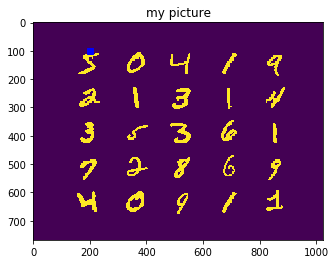

In [54]:
src = cv2.imread('random_digits_spread.png')
#src = cv2.imread('eqn1.jpg')

gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)
thresh = cv2.bitwise_not(thresh)

plt.imshow(thresh)
plt.plot(200,100, 'bs')
plt.title("my picture")
plt.show()

so now we have a binary image, lets find the connected components

In [55]:
connectivity = 4  # You need to choose 4 or 8 for connectivity type
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(thresh , connectivity , cv2.CV_32S, cv2.CCL_DEFAULT)


in the following graph, each color represents a different component, the number of labels is 26 as the background plane is also one label

number of labels 26


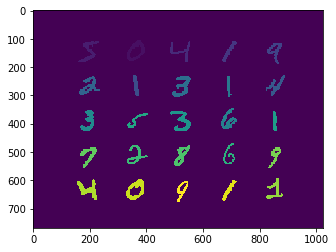

In [56]:
print("number of labels " + str(num_labels))
elevated_labels = [l * 10 for l in labels] # scaling them apart, does not make a difference visually
plt.imshow(elevated_labels)
plt.show()

now we are trying to isolate only one number given the labels. we can use the threshold to filter out numbers (bzt that is not that useful)

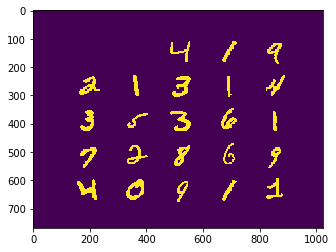

In [57]:
_, second = cv2.threshold(labels.astype('uint8'), 2, 255, cv2.THRESH_BINARY)
plt.imshow(second)

now we are getting the stats from the algorithm where the upper left corner of each number is supposed to be and plot that ontop of our original picture

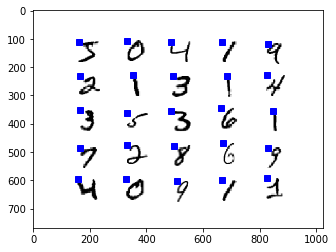

In [63]:
plt.imshow(src)
for i in range(1, num_labels):
    # get stats for i-th number by using stats[i, PROPERTY]
    left = stats[i, cv2.CC_STAT_LEFT]
    top = stats[i, cv2.CC_STAT_TOP]
    plt.plot(left, top, 'bs')
    #print(left, top)
plt.show()

now we want to crop only one number, we do that using the top left corner and width and height

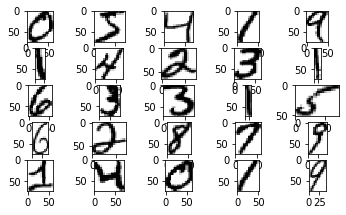

In [59]:
def extract_number(stats, src, i):
    left = stats[i, cv2.CC_STAT_LEFT]
    top = stats[i, cv2.CC_STAT_TOP]
    width = stats[i, cv2.CC_STAT_WIDTH]
    height = stats[i, cv2.CC_STAT_HEIGHT]
    number = src[top:top + height, left:left + width]
    cv2.imwrite(str(i) + ".png", number)
    return number

for i in range(1,num_labels):
    number = extract_number(stats, src, i)
    num = plt.subplot(6,5,i)
    num.imshow(number)
plt.show()


now we want to add borders to all the numbers such that we have square images as input files
lets take a look at the 6th image first (index 6)


(75, 23, 3)


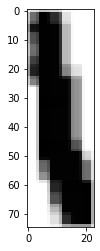

In [64]:
number = extract_number(stats, src, 6)
plt.imshow(number)
print(number.shape)
plt.show()

this means the image is 75 pixels high and 23 pixels wide

In [61]:

def make_square_out_of(number):
    height, width, _ = number.shape
    left, right, top, bottom = (0,0,0,0) #initialize borders
    if height > width:
        # add border left and right
        strech = (height - width) / 2
        # if strech is not an integer, strech 1 pixel more to the right
        left = math.floor(strech)
        right = math.ceil(strech)
    elif height < width:
        strech = (width - height) / 2
        top = math.floor(strech)
        bottom = math.ceil(strech)

    COLOR_WHITE = (255,255,255)
    # this function does all the magic
    dst = cv2.copyMakeBorder(number, top, bottom, left, right, cv2.BORDER_CONSTANT, None, COLOR_WHITE)
    return dst


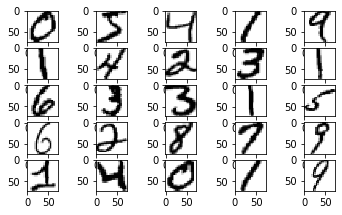

In [62]:
for i in range(1,num_labels):
    number = extract_number(stats, src, i)
    squared = make_square_out_of(number)
    num = plt.subplot(6,5,i)
    #cv2.imwrite(str(i) + "-sq.jpg", squared)
    num.imshow(squared)
plt.show()

it works! (in the notebook it looks a bit odd but if you check the saved files it looks as expected!)